In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix

In [3]:
sns.set_context("talk", font_scale = 0.8)

### Data Prep

In [4]:
df = pd.read_csv('./tweets_data/training_tweets.csv')

In [5]:
df['road_closed'].notnull()

0        True
1       False
2        True
3        True
4        True
        ...  
1032    False
1033    False
1034    False
1035    False
1036    False
Name: road_closed, Length: 1037, dtype: bool

In [6]:
train = df[(df['road_closed'] == 1) | (df['road_closed'] == 0)]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train['Text'], train['road_closed'], random_state = 1)

### Pipelines and Gridsearching

In [1096]:
pipe = Pipeline([
    ('tvec' , TfidfVectorizer()),
    ('nb', MultinomialNB())
])

params = {'tvec__stop_words' : [None, "english"],
          'tvec__max_features' : [None, 300, 500, 700],
          'tvec__ngram_range' : [(1,1), (1,2), (1,3)],
          'nb__alpha' : [0.05, 0.1, .2]}

gs = GridSearchCV(pipe, params, n_jobs=3, cv = 6)

gs.fit(X_train, y_train)

nb_tv = gs.best_estimator_
nb_tv.fit(X_train, y_train)

print(gs.best_params_)
print("best gs score: ", gs.best_score_)
print("testing score: ", gs.score(X_test, y_test))

{'nb__alpha': 0.05, 'tvec__max_features': 500, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}
best gs score:  0.9039193302891934
testing score:  0.8767123287671232


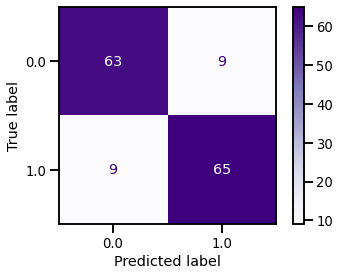

In [1142]:
plot_confusion_matrix(nb_tv, X_test, y_test, cmap = "Purples");

In [1098]:
pipe = Pipeline([
    ('cvec' , CountVectorizer()),
    ('nb', MultinomialNB())
])

params = {'cvec__stop_words' : [None, "english"],
          'cvec__max_features' : [None, 400, 500, 600],
          'cvec__ngram_range' : [(1,2), (1,3), (1,4)],
          'nb__alpha' : [0.01, 0.005, 0.03]}

gs = GridSearchCV(pipe, params, n_jobs=3, cv = 6)

gs.fit(X_train, y_train)

nb_cv = gs.best_estimator_
nb_cv.fit(X_train, y_train)

print(gs.best_params_)
print("best gs score: ", gs.best_score_)
print("testing score: ", gs.score(X_test, y_test))

{'cvec__max_features': 500, 'cvec__ngram_range': (1, 3), 'cvec__stop_words': None, 'nb__alpha': 0.01}
best gs score:  0.9039193302891934
testing score:  0.8767123287671232


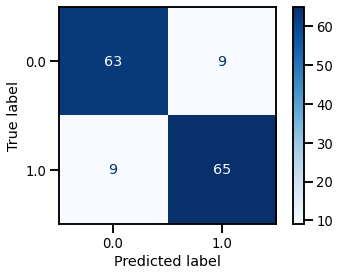

In [1143]:
plot_confusion_matrix(nb_cv, X_test, y_test, cmap = "Blues")

In [33]:
pipe = Pipeline([
    ('tvec' , TfidfVectorizer()),
    ('ada', AdaBoostClassifier())
])

params = {'tvec__stop_words' : [None],
          'tvec__max_features' : [None, 550, 600, 650],
          'tvec__ngram_range' : [(1,1), (1,2)],
          'ada__n_estimators' : [80, 90, 100],
          'ada__learning_rate' : [.12, 0.13, 0.11]}

gs = GridSearchCV(pipe, params, n_jobs=3, cv = 6)

gs.fit(X_train, y_train)

ada = gs.best_estimator_
ada.fit(X_train, y_train)

print(gs.best_params_)
print("best gs score: ", gs.best_score_)
print("testing score: ", gs.score(X_test, y_test))

{'ada__learning_rate': 0.13, 'ada__n_estimators': 100, 'tvec__max_features': 550, 'tvec__ngram_range': (1, 1), 'tvec__stop_words': None}
best gs score:  0.9039510400811771
testing score:  0.8972602739726028


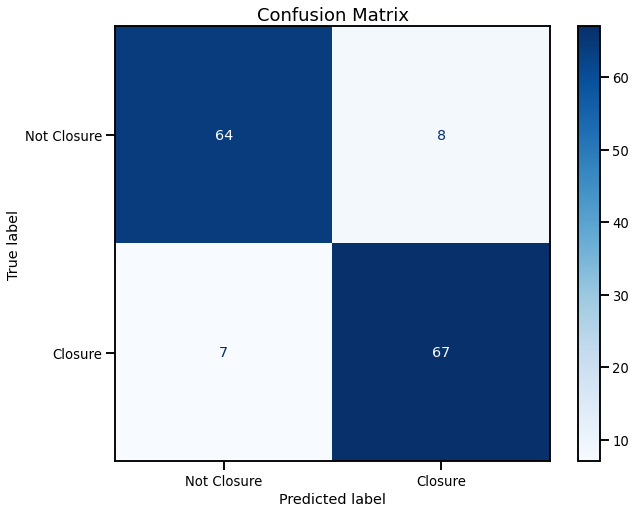

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,8))
plot_confusion_matrix(ada, X_test, y_test, cmap = "Blues", ax = ax, display_labels = ["Not Closure", "Closure"])
plt.title("Confusion Matrix", fontsize = 18);

In [8]:
pipe = Pipeline([
    ('tvec' , TfidfVectorizer()),
    ('dt', DecisionTreeClassifier())
])

params = {'tvec__stop_words' : ["english", None],
          'tvec__max_features' : [None, 400, 500, 600],
          'tvec__ngram_range' : [(1,2), (1,3), (1,4)],
          'dt__max_depth' : [None, 5, 7, 10],
          'dt__min_samples_split' : [2,3,5]}

gs = GridSearchCV(pipe, params, n_jobs=3, cv = 6)

gs.fit(X_train, y_train)

dt = gs.best_estimator_
dt.fit(X_train, y_train)

print(gs.best_params_)
print("best gs score: ", gs.best_score_)
print("testing score: ", gs.score(X_test, y_test))

{'dt__max_depth': 5, 'dt__min_samples_split': 5, 'tvec__max_features': None, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}
best gs score:  0.8741121258244545
testing score:  0.8287671232876712


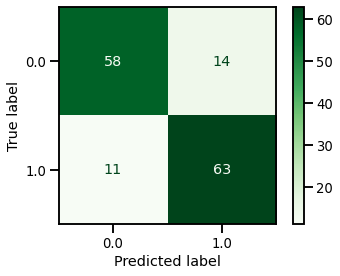

In [10]:
plot_confusion_matrix(dt, X_test, y_test, cmap = "Greens")

In [1110]:
svc_est = SVC()

pipe = Pipeline([
    ('tvec' , TfidfVectorizer()),
    ('svc', SVC())
])

params = {'tvec__stop_words' : ["english", None],
          'tvec__max_features' : [250, 275, 300],
          'tvec__ngram_range' : [(1,4), (1,2), (1,3),],
          'svc__kernel' : ['poly'],
          'svc__degree' : [2],
          'svc__C' : [1, .85, .75, .5]}

gs = GridSearchCV(pipe, params, n_jobs=3, cv = 6)

gs.fit(X_train, y_train)

svc = gs.best_estimator_
svc.fit(X_train, y_train)

print(gs.best_params_)
print("best gs score: ", gs.best_score_)
print("testing score: ", gs.score(X_test, y_test))

{'svc__C': 0.85, 'svc__degree': 2, 'svc__kernel': 'poly', 'tvec__max_features': 275, 'tvec__ngram_range': (1, 3), 'tvec__stop_words': None}
best gs score:  0.9176496702181632
testing score:  0.8904109589041096


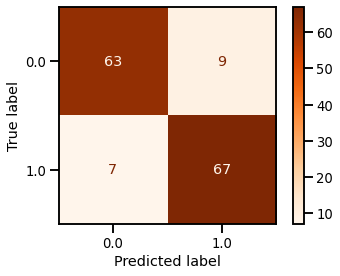

In [1197]:
plot_confusion_matrix(svc, X_test, y_test, cmap = "Oranges")

In [1205]:
vc = VotingClassifier([("dt", dt), ("svc", svc), ("ada", ada)])
vc.fit(X_train, y_train)
vc.score(X_test, y_test)

0.8904109589041096

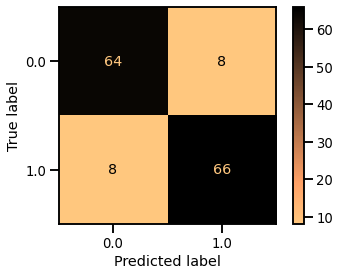

In [1206]:
plot_confusion_matrix(vc, X_test, y_test, cmap = 'copper_r');

In [1207]:
cvscore = cross_val_score(vc, X_train, y_train)
cvscore

array([0.86363636, 0.88636364, 0.94252874, 0.94252874, 0.93103448])

In [1208]:
cvscore.mean()

0.9132183908045978

### Predictions

In [16]:
df.drop(columns = 'docs', inplace=True)

In [18]:
df['predictions'] = ada.predict(df['Text'])

In [21]:
df.to_csv('./tweets_data/tweets_predictions.csv', index = False)

### Pickling

In [24]:
import pickle

In [26]:
pickle.dump(ada, open('./models/tweets_ada_model.p', 'wb'))